# Error matrix spectal norm bound

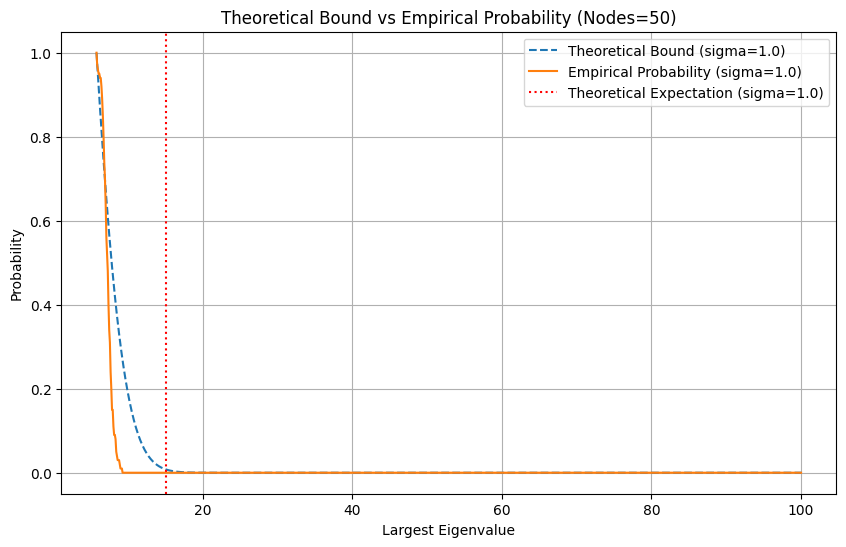

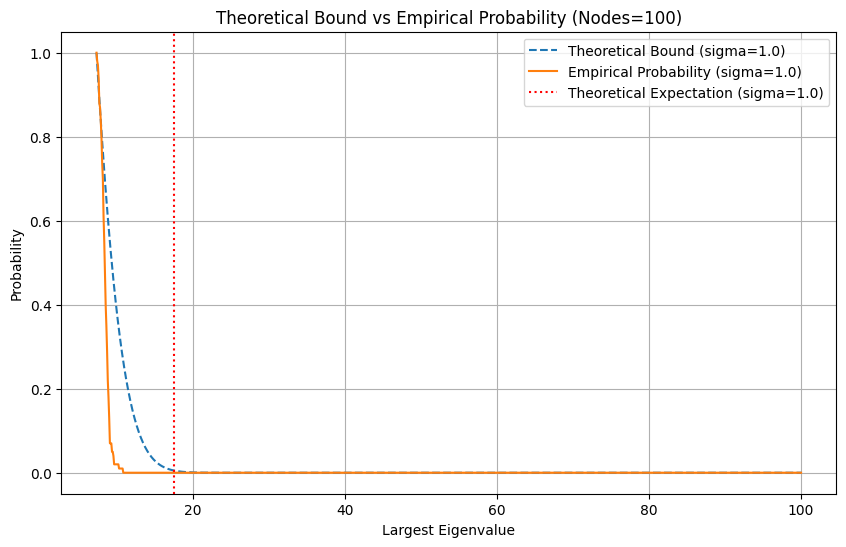

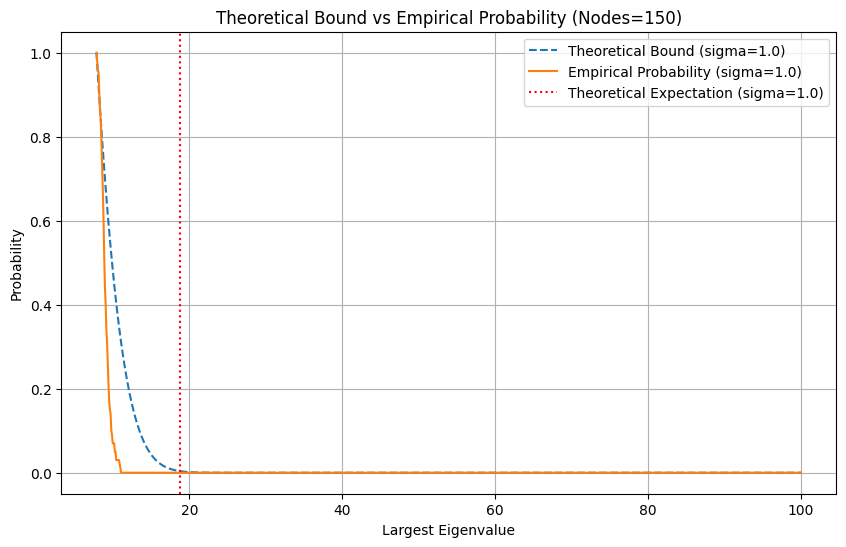

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        for B_block in [S1, S2, S3]:
            B = np.zeros((3 * n, 3 * n))
            B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
            B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block
            sum_B += B @ B.T

    operator_norm = np.linalg.norm(sum_B, ord=2)
    return operator_norm

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound
def theoretical_bound(t, num_nodes, vZ):
    return (3 * num_nodes + 3 * num_nodes) * np.exp(-t**2 / (2 * vZ))

# Function to compute theoretical expectation
def compute_theoretical_expectation(vZ, num_nodes):
    return np.sqrt(2 * vZ * np.log(2 * 3 * num_nodes))

# Parameters
num_nodes_list = [50, 100, 150]  # Different numbers of nodes to test
sigma_values = [1.0]  
num_trials = 100

# Run experiments and collect results
for num_nodes in num_nodes_list:
    results = {sigma: [] for sigma in sigma_values}

    for sigma in sigma_values:
        for _ in range(num_trials):
            r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
            G = nx.random_geometric_graph(num_nodes, r)
            adj_matrix = nx.adjacency_matrix(G).todense()

            V_z = generate_symmetric_matrix_sum(adj_matrix, sigma)
            kron_matrix = generate_kron_matrix(adj_matrix, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            results[sigma].append((largest_eigenvalue, V_z))

    # Plot empirical distribution of largest eigenvalues
    fig, ax = plt.subplots(figsize=(10, 6))
    for sigma, values in results.items():
        eigenvalues = [v[0] for v in values]
        V_z = values[0][1]
        t_values = np.linspace(np.min(eigenvalues), 100, 1000)
        bound_values = theoretical_bound(t_values, num_nodes, V_z)
        bound_values /= np.max(bound_values)
        empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
        empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)

        theoretical_expectation = compute_theoretical_expectation(V_z, num_nodes)

        ax.plot(t_values, bound_values, label=f'Theoretical Bound (sigma={sigma})', linestyle='dashed')
        ax.plot(t_values, empirical_probs, label=f'Empirical Probability (sigma={sigma})', linestyle='solid')
        ax.axvline(theoretical_expectation, color='r', linestyle='dotted', label=f'Theoretical Expectation (sigma={sigma})')

    ax.set_xlabel('Largest Eigenvalue')
    ax.set_ylabel('Probability')
    ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
    ax.legend()
    ax.grid(True)
    plt.show()


# Error to graph connectivity bound

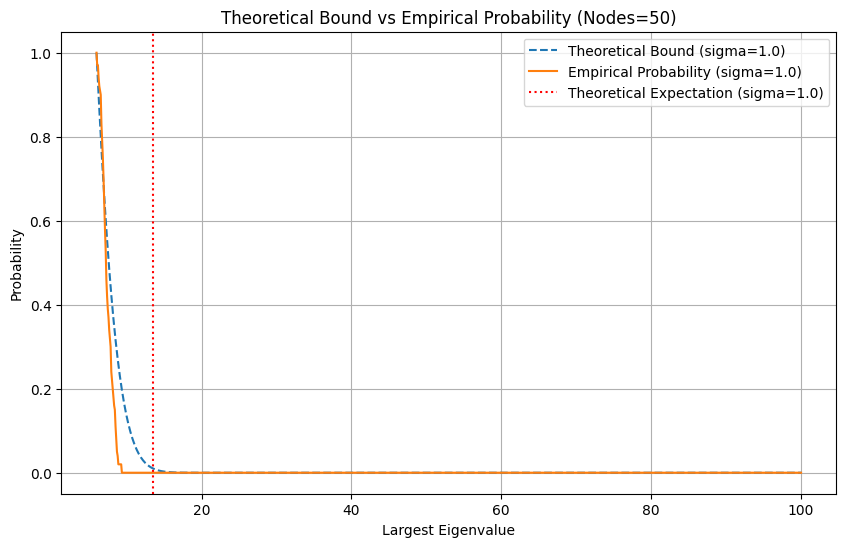

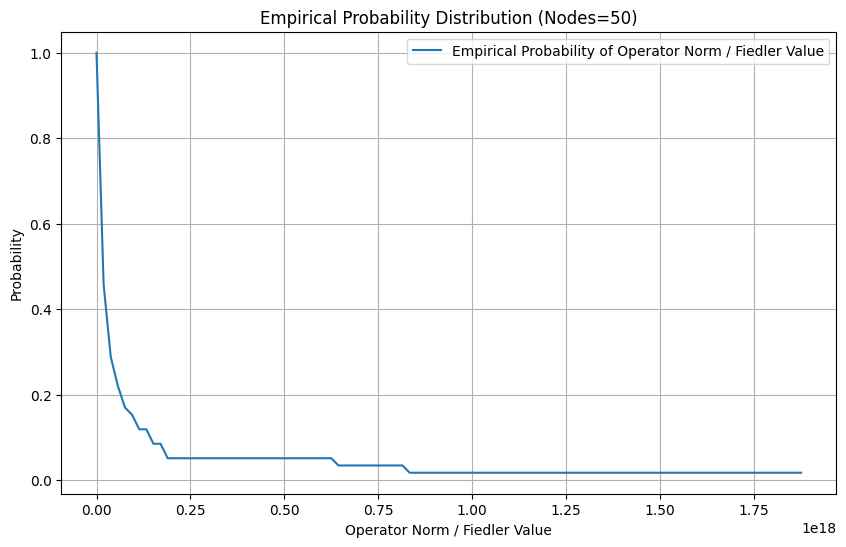

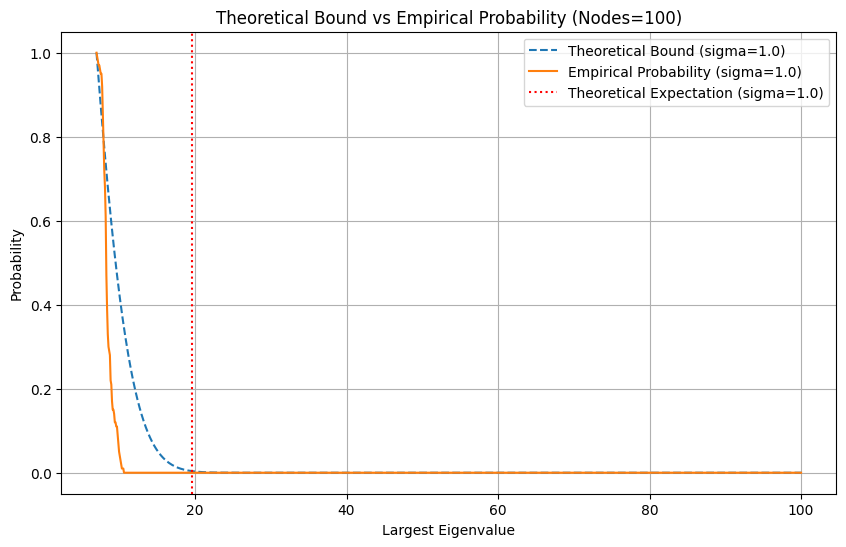

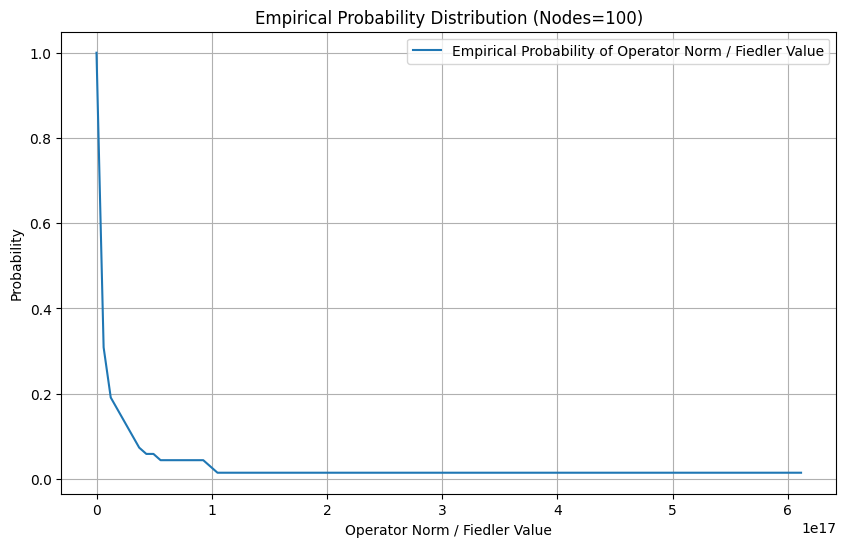

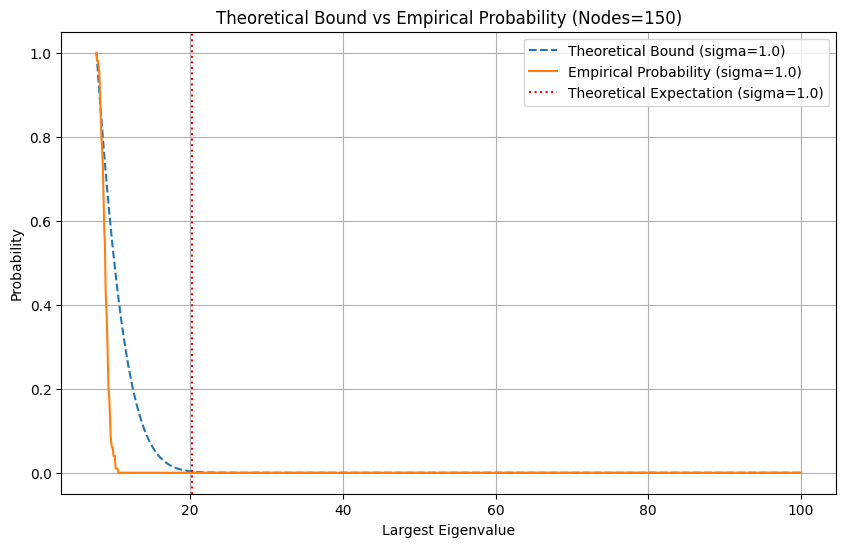

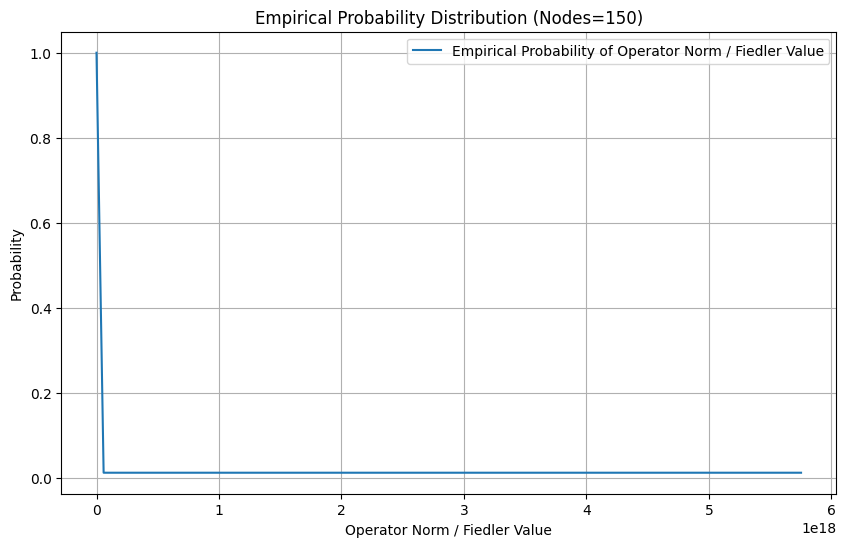

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        for B_block in [S1, S2, S3]:
            B = np.zeros((3 * n, 3 * n))
            B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
            B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block
            sum_B += B @ B.T

    operator_norm = np.linalg.norm(sum_B, ord=2)
    return operator_norm

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute the Fiedler value (second smallest eigenvalue of Laplacian matrix)
def compute_fiedler_value(G):
    L = nx.laplacian_matrix(G).toarray()
    eigenvalues = np.linalg.eigvalsh(L)  # Returns sorted eigenvalues
    return eigenvalues[1] if len(eigenvalues) > 1 else 0  # Second smallest eigenvalue

# Function to compute theoretical bound
def theoretical_bound(t, num_nodes, vZ):
    return (3 * num_nodes + 3 * num_nodes) * np.exp(-t**2 / (2 * vZ))

# Function to compute theoretical expectation
def compute_theoretical_expectation(vZ, num_nodes):
    return np.sqrt(2 * vZ * np.log(2 * 3 * num_nodes))

# Parameters
num_nodes_list = [50, 100, 150]  # Different numbers of nodes to test
sigma_values = [1.0]  
num_trials = 100

# Run experiments and collect results
for num_nodes in num_nodes_list:
    results = {sigma: [] for sigma in sigma_values}
    ratio_list = []  # Store operator_norm / Fiedler value ratios

    for sigma in sigma_values:
        for _ in range(num_trials):
            r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
            G = nx.random_geometric_graph(num_nodes, r)
            adj_matrix = nx.adjacency_matrix(G).todense()

            V_z = generate_symmetric_matrix_sum(adj_matrix, sigma)
            kron_matrix = generate_kron_matrix(adj_matrix, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            fiedler_value = compute_fiedler_value(G)  # Compute Fiedler value

            if fiedler_value > 0:  # Avoid division by zero
                ratio = V_z / fiedler_value
                ratio_list.append(ratio)

            results[sigma].append((largest_eigenvalue, V_z, fiedler_value))

    # Plot empirical distribution of largest eigenvalues
    fig, ax = plt.subplots(figsize=(10, 6))
    for sigma, values in results.items():
        eigenvalues = [v[0] for v in values]
        V_z = values[0][1]
        t_values = np.linspace(np.min(eigenvalues), 100, 1000)
        bound_values = theoretical_bound(t_values, num_nodes, V_z)
        bound_values /= np.max(bound_values)
        empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
        empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)

        theoretical_expectation = compute_theoretical_expectation(V_z, num_nodes)

        ax.plot(t_values, bound_values, label=f'Theoretical Bound (sigma={sigma})', linestyle='dashed')
        ax.plot(t_values, empirical_probs, label=f'Empirical Probability (sigma={sigma})', linestyle='solid')
        ax.axvline(theoretical_expectation, color='r', linestyle='dotted', label=f'Theoretical Expectation (sigma={sigma})')

    ax.set_xlabel('Largest Eigenvalue')
    ax.set_ylabel('Probability')
    ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
    ax.legend()
    ax.grid(True)
    plt.show()

    # Plot empirical probability of operator_norm / Fiedler_value ratio
    fig, ax = plt.subplots(figsize=(10, 6))
    ratio_values = np.linspace(min(ratio_list), max(ratio_list), 100)
    ratio_probs = [np.mean(np.array(ratio_list) >= r) for r in ratio_values]
    ratio_probs = np.array(ratio_probs) / np.max(ratio_probs)

    ax.plot(ratio_values, ratio_probs, label="Empirical Probability of Operator Norm / Fiedler Value")
    ax.set_xlabel("Operator Norm / Fiedler Value")
    ax.set_ylabel("Probability")
    ax.set_title(f"Empirical Probability Distribution (Nodes={num_nodes})")
    ax.legend()
    ax.grid(True)
    plt.show()


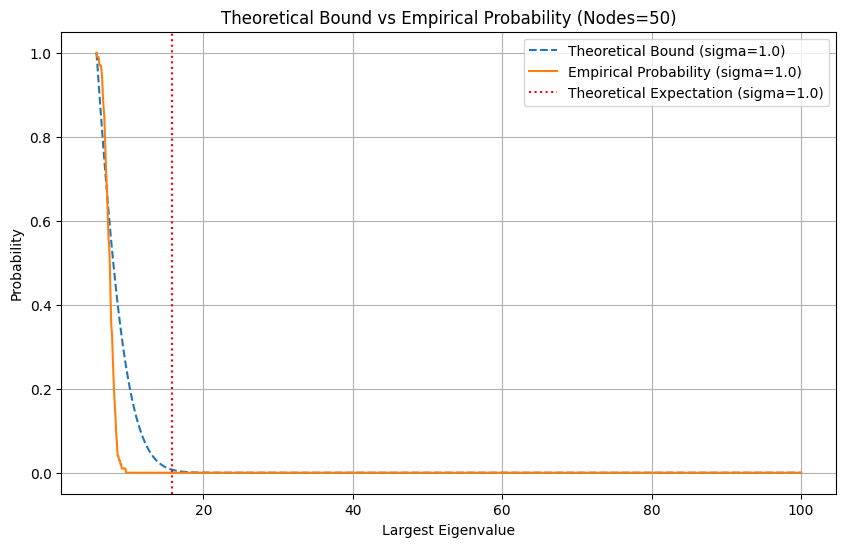

KeyboardInterrupt: 

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        for B_block in [S1, S2, S3]:
            B = np.zeros((3 * n, 3 * n))
            B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
            B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
            sum_B += B @ B.T
            print("sum_B : ", sum_B)

    operator_norm = np.linalg.norm(sum_B, ord=2)
    return operator_norm

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound
def theoretical_bound(t, num_nodes, vZ):
    return (3 * num_nodes + 3 * num_nodes) * np.exp(-t**2 / (2 * vZ))

# Function to compute theoretical expectation
def compute_theoretical_expectation(vZ, num_nodes):
    return np.sqrt(2 * vZ * np.log(2 * 3 * num_nodes))

# Parameters
num_nodes_list = [5, 50, 100, 150]  # Different numbers of nodes to test
sigma_values = [1.0]  
num_trials = 100

# Run experiments and collect results
for num_nodes in num_nodes_list:
    results = {sigma: [] for sigma in sigma_values}

    for sigma in sigma_values:
        for _ in range(num_trials):
            r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
            G = nx.random_geometric_graph(num_nodes, r)
            adj_matrix = nx.adjacency_matrix(G).todense()

            V_z = generate_symmetric_matrix_sum(adj_matrix, sigma)
            kron_matrix = generate_kron_matrix(adj_matrix, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            results[sigma].append((largest_eigenvalue, V_z))

    # Plot empirical distribution of largest eigenvalues
    fig, ax = plt.subplots(figsize=(10, 6))
    for sigma, values in results.items():
        eigenvalues = [v[0] for v in values]
        V_z = values[0][1]
        t_values = np.linspace(np.min(eigenvalues), 100, 1000)
        bound_values = theoretical_bound(t_values, num_nodes, V_z)
        bound_values /= np.max(bound_values)
        empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
        empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)

        theoretical_expectation = compute_theoretical_expectation(V_z, num_nodes)

        ax.plot(t_values, bound_values, label=f'Theoretical Bound (sigma={sigma})', linestyle='dashed')
        ax.plot(t_values, empirical_probs, label=f'Empirical Probability (sigma={sigma})', linestyle='solid')
        ax.axvline(theoretical_expectation, color='r', linestyle='dotted', label=f'Theoretical Expectation (sigma={sigma})')

    ax.set_xlabel('Largest Eigenvalue')
    ax.set_ylabel('Probability')
    ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
    ax.legend()
    ax.grid(True)
    plt.show()
